Food rating 0-10: 10
Service rating 0-10: 7
### Normalized Fuzzy Outputs: ###
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.26666667 0.53333333
 0.73333333 0.86666667 1.         1.         1.         1.
 1.        ]


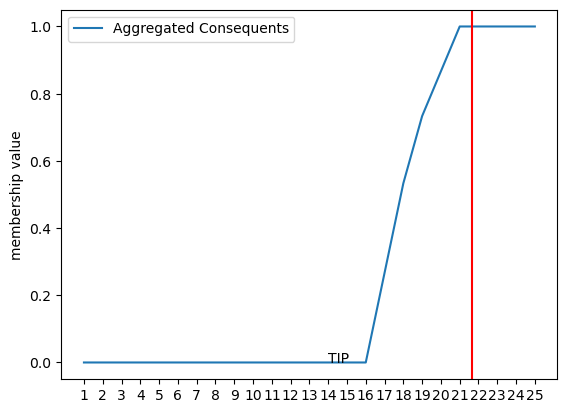

### The tip should be: ###
21.67567567567568 %


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, 'C:\\OneDrive\\Desktop\\AI lecturer learning\\')

%run fuzzy_tipping_problem.ipynb

#print the food/service mem fns
def print_mem_fns1(A, B, C):
    plt.plot(A, label="GOOD food/service")
    plt.plot(B, label="MEDIUM food/service")
    plt.plot(C, label="BAD food/service")
    plt.ylabel('membership value')
    plt.xlabel("rating")
    plt.legend()
    plt.show()
    
# print the tip mem fns
def print_mem_fns2(D, E, F):
    plt.plot(D, label="GOOD tip")
    plt.plot(E, label="MEDIUM tip")
    plt.plot(F, label="BAD tip")
    plt.ylabel('membership value')
    plt.xlabel("tip percentage")
    plt.legend()
    plt.show()

# start the inputs
def create_tipping_problem():
    # Rating Scale
    X = np.arange(start=0, stop=11)
    
    # Tip range
    Y = np.arange(start=0.0, stop=25.0)
    
    #GOOD Food/Service
    A = make_trap_membership_fn(X,6,10,10,11)
    # MEDIUM Food/Service
    B = make_trap_membership_fn(X,1,5,5,9)
    #POOR Food/Service
    C = make_trap_membership_fn(X,0,0,0,4)
    
    # GOOD Tip
    D = make_trap_membership_fn(Y,15,25,25 ,25)
    # Medium Tip
    E = make_trap_membership_fn(Y,5,15,15,20)
    # POOR Tip
    F = make_trap_membership_fn(Y,0,0,0,15)
    
    #0 = Good Tip/service
    #1 = Medium Tip/service
    #2 = Low Tip/service
    
    #0 = High Tip
    #1 = Medium Tip
    #2 = Low Tip
    
    # rules, contains indexes of which FS they belong to
    rules = []

    rule = Rule(np.array([0,0]),0)
    rules.append(rule)
    
    rule = Rule(np.array([2,2]),2)
    rules.append(rule)
    
    rule = Rule(np.array([0,2]),1)
    rules.append(rule)
    
    rule = Rule(np.array([2,0]),1)
    rules.append(rule)
    
    rule = Rule(np.array([1,2]),2)
    rules.append(rule)

    rule = Rule(np.array([2,1]),2)
    rules.append(rule)
    
    rule = Rule(np.array([0,1]),0)
    rules.append(rule)
    
    rule = Rule(np.array([1,0]),0)
    rules.append(rule)
    
    rule = Rule(np.array([1,1]),1)
    rules.append(rule)
    
    #must be in order
    antecedent_membership_fns = []
    antecedent_membership_fns.append(A)
    antecedent_membership_fns.append(B)
    antecedent_membership_fns.append(C)
    
    #must be in order
    consequent_membership_fns = []
    consequent_membership_fns.append(D)
    consequent_membership_fns.append(E)
    consequent_membership_fns.append(F)
    
    implication_op = "z"
    
    #inputs to the system
    inputs = np.zeros(2)
    inputs[0] = int(input("Food rating 0-10: "))
    inputs[1] = int(input("Service rating 0-10: "))
    
    #fuzzy res
    res = generalized_fuzzy_logic(rules, antecedent_membership_fns, consequent_membership_fns, implication_op, inputs)
    
    print("### Normalized Fuzzy Outputs: ###")
    print(res)
    
    o = centroid_deffuzification(res)
    
    print_normalized_aggr(res, o)
    
    print("### The tip should be: ###")
    print(o, "%")
create_tipping_problem()